In [7]:
#加载数据集
import seaborn as sns
iris = sns.load_dataset('iris')
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


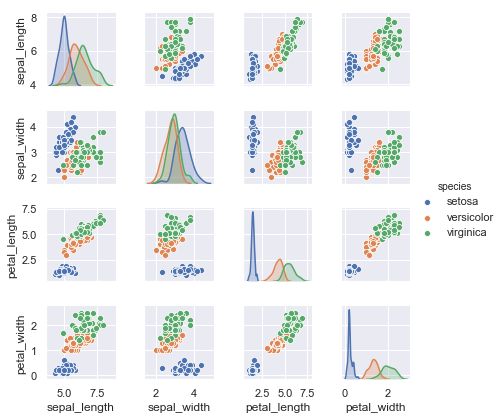

In [8]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [11]:
# 获取特征矩阵
X_iris = iris.drop('species', axis=1)
y_iris = iris['species'] #目标数组

## 高斯朴素贝叶斯分类

In [10]:

# 切分数据集
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

#查看准确率
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## 数据降维

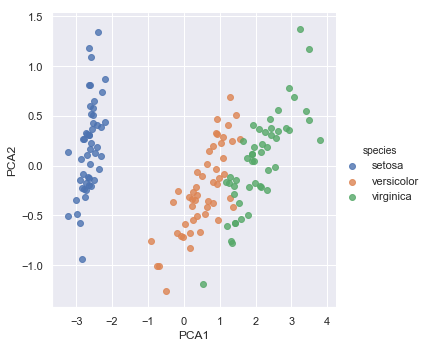

In [18]:
from sklearn.decomposition import PCA # 1.选择模型类
model = PCA(n_components=2) # 2.设置超参数，初始化模型
model.fit(X_iris) # 3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris) # 4. 将数据转换为二维

##查看数据效果
iris['PCA1'] = X_2D[:, 0] 
iris['PCA2'] = X_2D[:, 1] 
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## 聚类分析 高斯混合模型

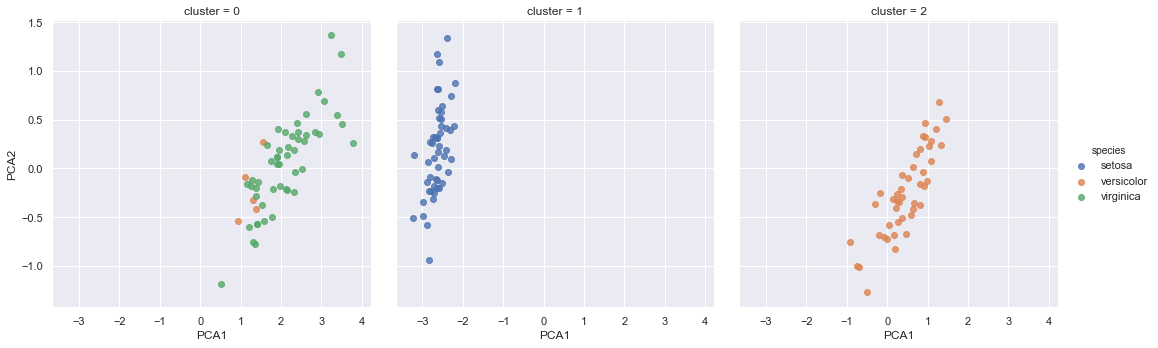

In [26]:
from sklearn.mixture import GaussianMixture# 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [30]:
## 继续分析
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

#k近邻
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X, y)
y_model = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.9733333333333334

In [38]:
#但是上述方法不好，这里采用hold-out
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
print( 'accuracy',accuracy_score(y2, y2_model))

#交叉验证. 自动切分，并测试
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=10)

accuracy 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [40]:
#留一法
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.9666666666666667
